In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
train=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
train['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
train.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

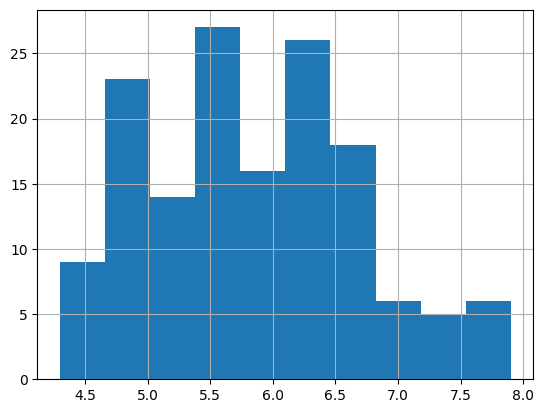

In [8]:
train['SepalLengthCm'].hist()

<Axes: >

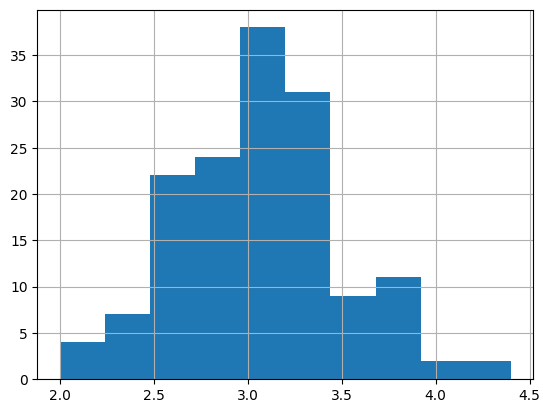

In [9]:
train['SepalWidthCm'].hist()

<Axes: >

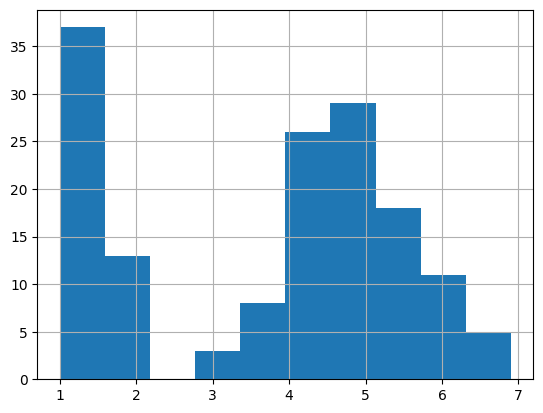

In [10]:
train['PetalLengthCm'].hist()

<Axes: >

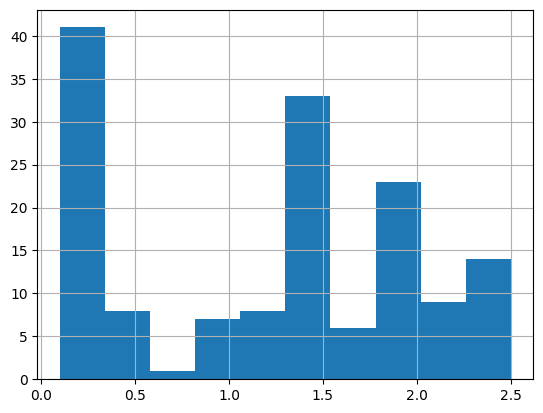

In [11]:
train['PetalWidthCm'].hist()

<Axes: >

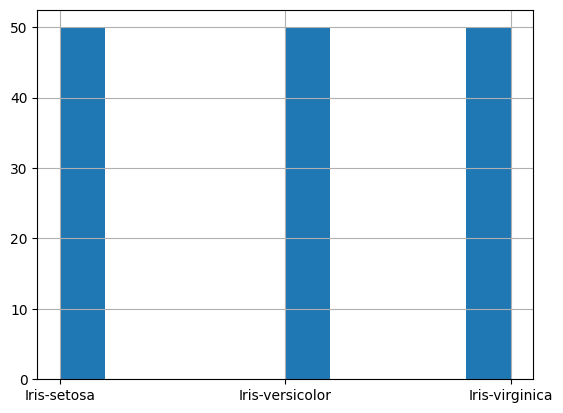

In [12]:
train['Species'].hist()

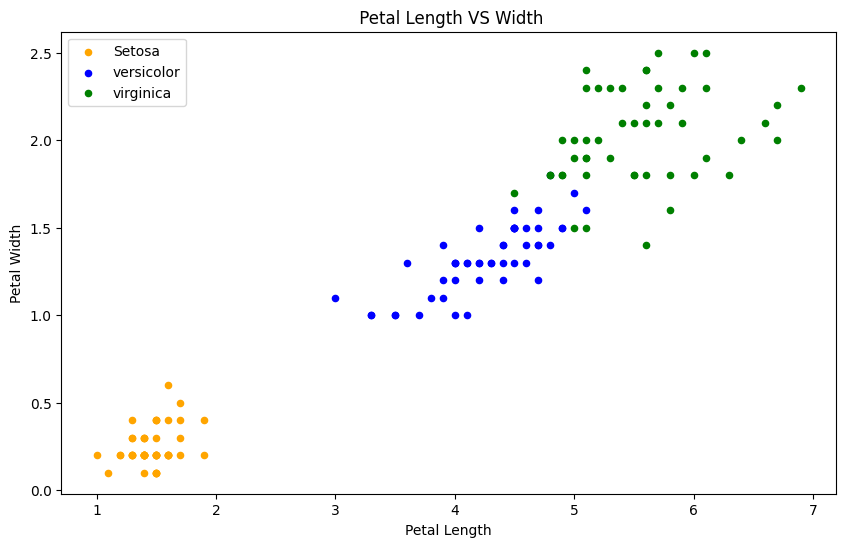

In [13]:
fig = train[train.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
train[train.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
train[train.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

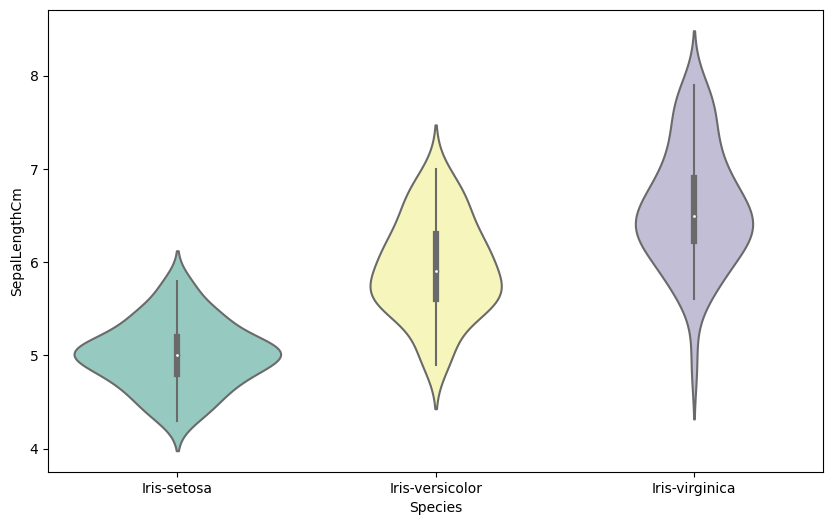

In [15]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = train, palette = 'Set3')
plt.xlabel('Species')
plt.ylabel('SepalLengthCm')
plt.show()

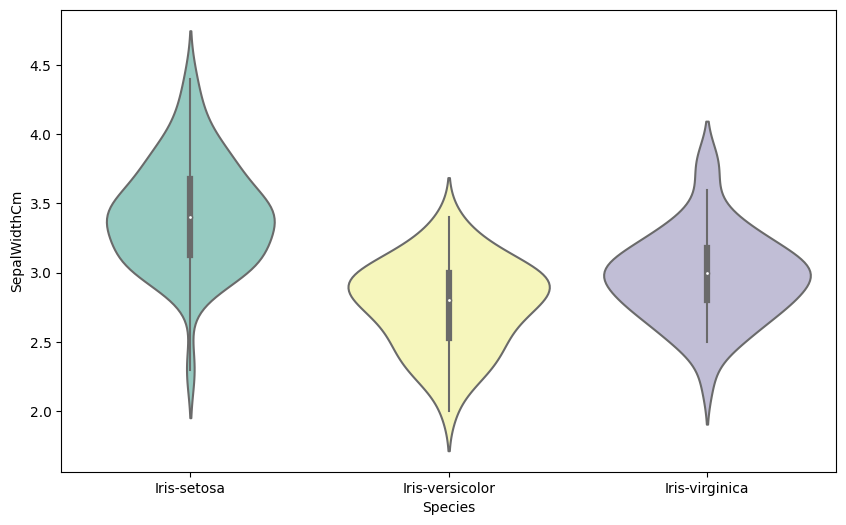

In [16]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = train, palette = 'Set3')
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')
plt.show()


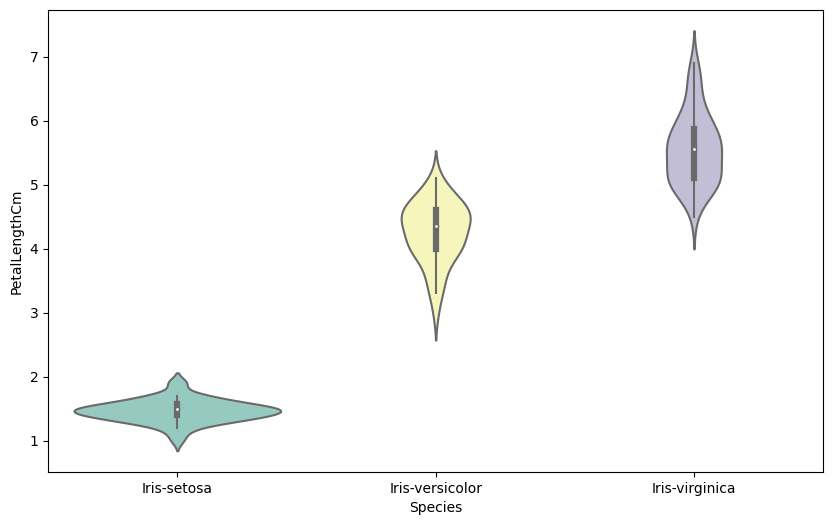

In [17]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = train, palette = 'Set3')
plt.xlabel('Species')
plt.ylabel('PetalLengthCm')
plt.show()

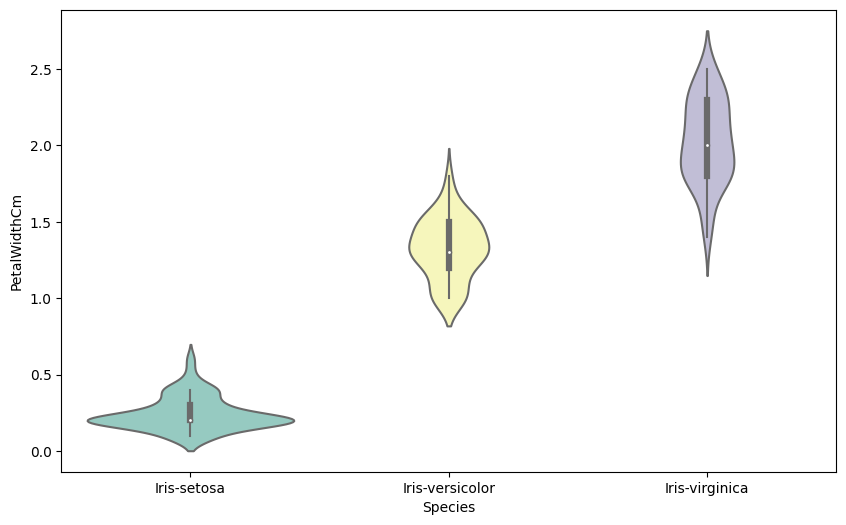

In [18]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = train, palette = 'Set3')
plt.xlabel('Species')
plt.ylabel('PetalWidthCm')
plt.show()

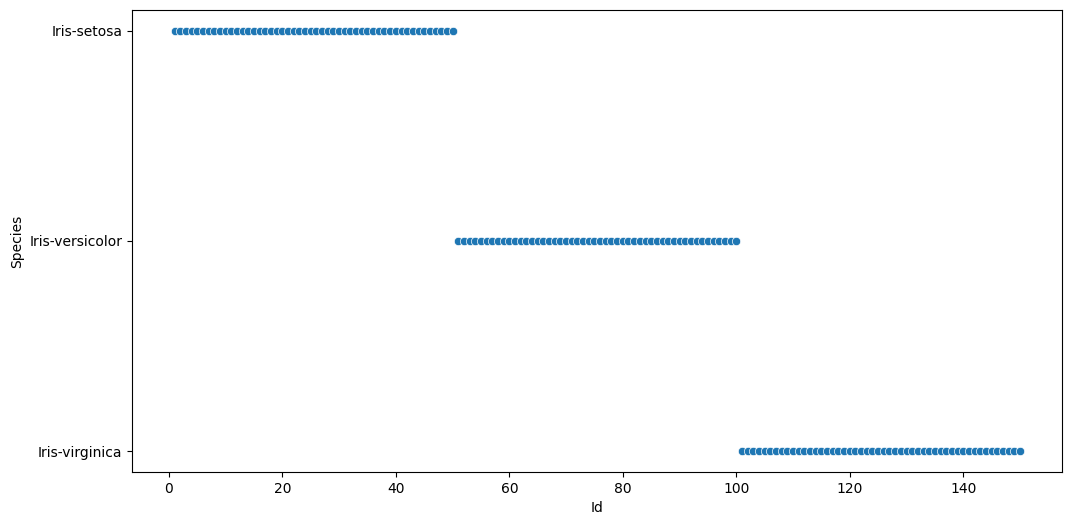

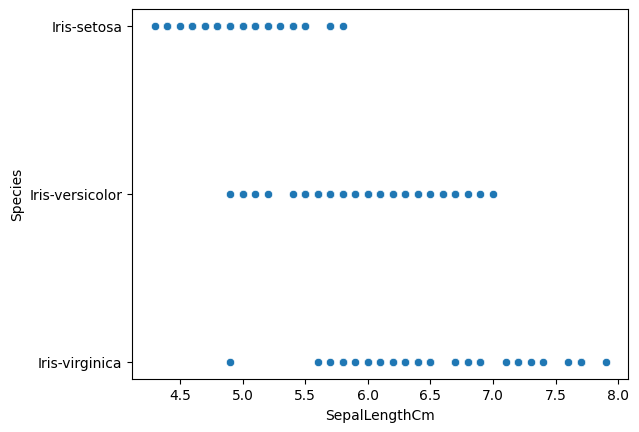

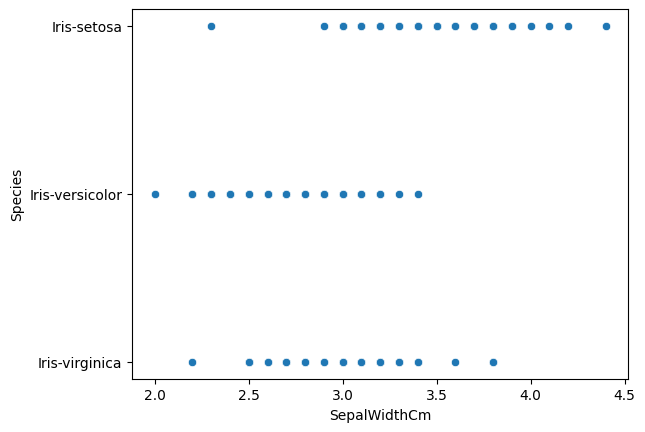

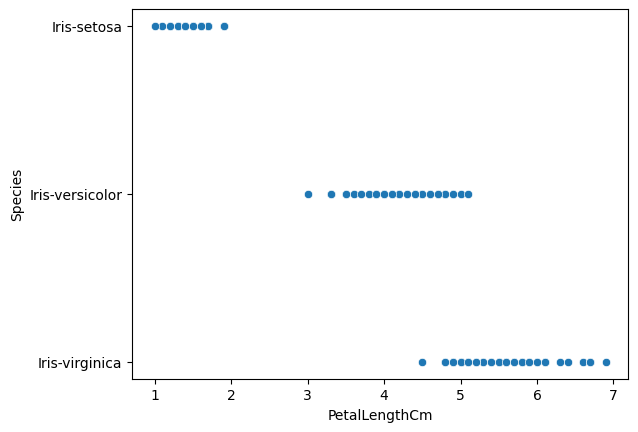

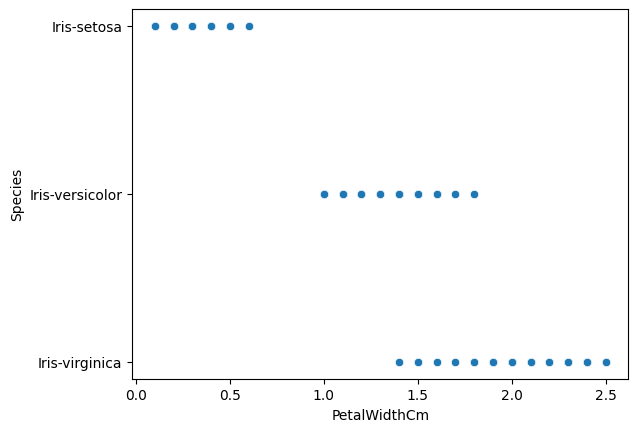

In [19]:
plt.figure(figsize=(12,6))
for i,col in  enumerate(['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']):
    
    sns.scatterplot(x=col,y='Species',data= train)
    plt.show()

In [20]:
train.query('SepalWidthCm<2.5 and Species=="Iris-setosa"')
#drop id- 42

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,42,4.5,2.3,1.3,0.3,Iris-setosa


In [21]:
val=[42]
train = train[train.Id.isin(val) == False]

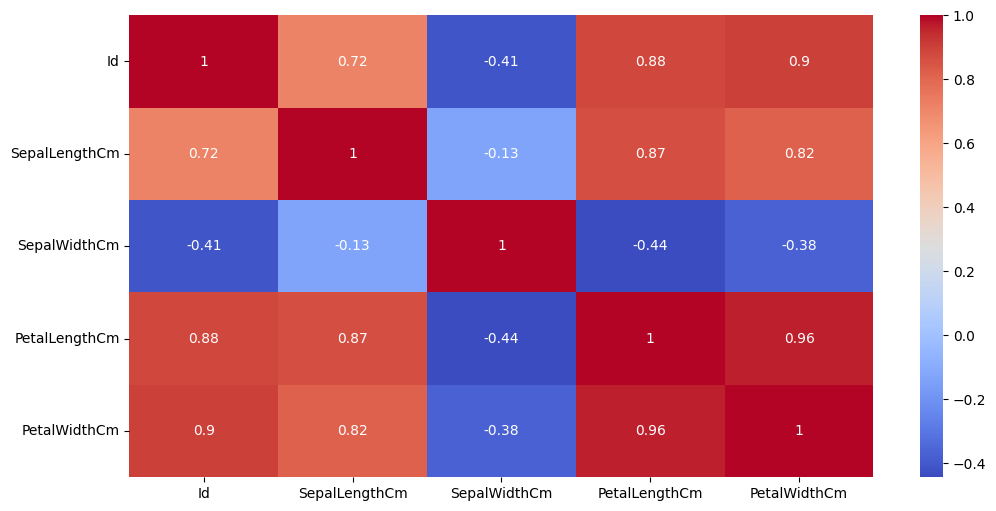

In [22]:
corr_matrix = train.drop(columns = 'Species').corr()

#create a heatmap of the correlation matrix
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [23]:
train.drop_duplicates(inplace = True)
train.duplicated().sum()

0

In [24]:
x=train.drop(columns=['Species'])
y=train['Species']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)



In [25]:

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
classifier_pred = classifier.predict(x_test)
accuracy_score(y_test, classifier_pred)


1.0

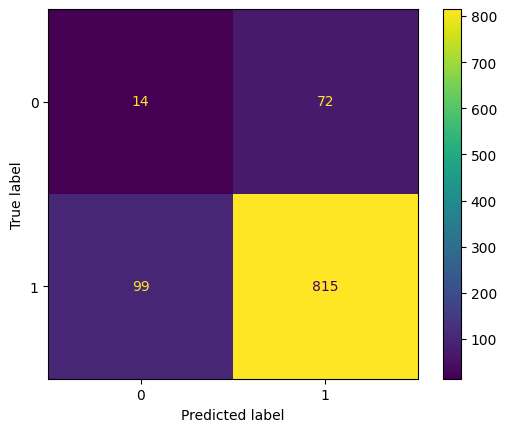

In [26]:
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [27]:
precision=(815)/(815+72)
recall=(815)/(815+99)
f1=2*((precision*recall)/(precision+recall))
print("f1 score=",f1)

f1 score= 0.9050527484730705
